# **Collecting Data**
This dataset for orange resistance is from kaggle :
1. https://www.kaggle.com/sriramr/fruits-fresh-and-rotten-for-classification

For this model, we take only the good quality orange dataset. 

Before start, ensure to download dataset. We already zip it to drive in link below 
https://drive.google.com/file/d/1eDk3JkUpz5mqfvCkE1ZuZ8UFa-w8IfLG/view?usp=sharing

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [4]:
from google.colab import drive

#to connect drive account to colab
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [5]:
import shutil
import os

source = r'/content/gdrive/MyDrive/orange_new.zip'
destination = r'/content/orange.zip'
shutil.copyfile(source, destination)

'/content/orange.zip'

In [6]:
#to extract the zip format of dataset
import zipfile 
local_zip = destination
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

# **Explore dataset & preprocessing**

In [7]:
path = r'/content/orange/'
categories= os.listdir(path)
categories

['12', '7', '1', '3']

12, 7, 1, 3 means that the fruit is still good for 12 more days, 7 more days, 1 more days or 3 more days

In [8]:
def count_num_file(path,name_dir):
  num_file = len(os.listdir(path+name_dir))
  return num_file
  
for categorie in categories :
  print("{} more days directory : {} file ".format(categorie, count_num_file(path,categorie)))

12 more days directory : 741 file 
7 more days directory : 469 file 
1 more days directory : 72 file 
3 more days directory : 288 file 


**Image Augmentation**


---


1 more days directory have small number of file (72) compare to the large one is 7 more days that have 469 file. So we add more augmentation on that directory. 

In [9]:
import os
from PIL import Image 
path_rotate = r'/content/orange/1/'
file_name = os.listdir(path_rotate)

for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(40).save(path_rotate+'rotate_40'+i)
for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(50).save(path_rotate+'rotate_50'+i)
for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(65).save(path_rotate+'rotate_65'+i)

for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(85).save(path_rotate+'rotate_85'+i)
            
for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(100).save(path_rotate+'rotate_100'+i)

for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(125).save(path_rotate+'rotate_125'+i)
for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(145).save(path_rotate+'rotate_145'+i)
for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(200).save(path_rotate+'rotate_200'+i)

for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(225).save(path_rotate+'rotate_225'+i)

for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(240).save(path_rotate+'rotate_240'+i)

In [10]:
for categorie in categories :
  print("{} folder : {} file ".format(categorie, count_num_file(path,categorie)))

12 folder : 741 file 
7 folder : 469 file 
1 folder : 152 file 
3 folder : 288 file 


**Look at the dataset (plot)**

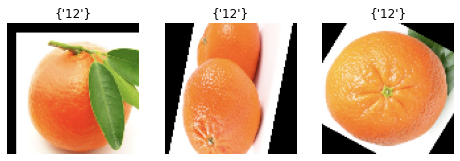

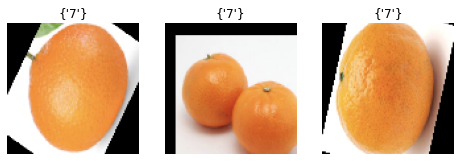

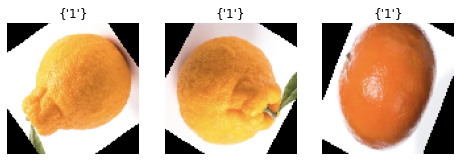

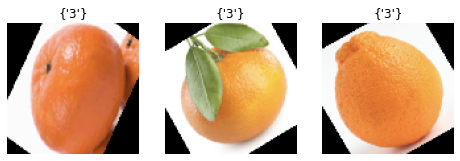

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
%matplotlib inline


def plot_img(name):
  img = [fn for fn in os.listdir(f'{path}/{name}')]
  select_img= np.random.choice(img, 3, replace = False)
  
  fig = plt.figure(figsize = (8,6))
  for i in range(3):
      if i < 3:
        fp = f'{path}/{name}/{select_img[i]}'
        label = {name}
      
      ax = fig.add_subplot(1,3,i+1)
    
      fn = image.load_img(fp, target_size = (100,100))
      plt.imshow(fn)
      plt.title(label)
      plt.axis('off')
  plt.show()

for categorie in categories:
  plot_img(categorie)